In [7]:
from sktime.datasets import load_longley
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.impute import Imputer
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.preprocessing import MinMaxScaler

import pandas as pd, numpy as np

In [2]:
y, X = load_longley()
y_train, _, X_train, X_test = temporal_train_test_split(y, X)
fh = ForecastingHorizon(X_test.index, is_relative=False)
pipe = ForecastingPipeline(steps=[
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ("forecaster", NaiveForecaster(strategy="drift"))
]) 
pipe.fit(y_train, X_train)
y_pred = pipe.predict(fh=fh, X=X_test)

<AxesSubplot:>

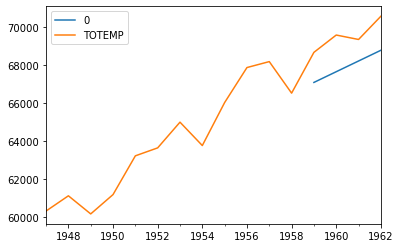

In [8]:
pd.concat((y_pred, y), axis=1).plot()

In [11]:
pd.concat((X,y), axis=1)

,GNPDEFL,GNP,UNEMP,ARMED,POP,TOTEMP
Period,,,,,,
1947,83.0,234289.0,2356.0,1590.0,107608.0,60323.0
1948,88.5,259426.0,2325.0,1456.0,108632.0,61122.0
1949,88.2,258054.0,3682.0,1616.0,109773.0,60171.0
1950,89.5,284599.0,3351.0,1650.0,110929.0,61187.0
1951,96.2,328975.0,2099.0,3099.0,112075.0,63221.0
1952,98.1,346999.0,1932.0,3594.0,113270.0,63639.0
1953,99.0,365385.0,1870.0,3547.0,115094.0,64989.0
1954,100.0,363112.0,3578.0,3350.0,116219.0,63761.0
1955,101.2,397469.0,2904.0,3048.0,117388.0,66019.0
